> NOTE: This notebook does some semi complex plotting of mounted sensors at Folger Deep and Folger Pinnacle, and looks into specific, interesting time periods. It uses helper functions from another file but I have still tried to be semi transparent about the key steps like the API call. I am not sure how much backend code we want visible, but I built this notebook so that much of the visible code can be easily minimized.

> TODO: look into current plotting, integrate wind data

In [ ]:
# !pip install --upgrade pip
# !pip install onc
# !pip install python-dotenv

# Folger Passage: Key Ocean Health Indicators

![Folger Neptune Map](https://cdn.onc-prod.intergalactic.space/folgerpassage_300dpi_ff2a03c373.jpg)

In [2]:
# TODO: INTRO PARAGRAPH PLACEHOLDER
"""
We will need to add an introduction paragraph here, describing what we have in Folger and the 
two observing locations/installations. Will also be nice to have some photos of the platforms and their instrumentation.
- Dwight
"""

'\nWe will need to add an introduction paragraph here, describing what we have in Folger and the \ntwo observing locations/installations. Will also be nice to have some photos of the platforms and their instrumentation.\n- Dwight\n'

## Plotting One Year of Data - Folger Deep and Pinnacle

In [ ]:
import onc # library for ONC
import mount_helpers as my_functions # the helper functions
import pandas as pd # library to make data frames and datetime objects

import os
# token = os.environ["GRACE_TOKEN"]
from dotenv import load_dotenv
load_dotenv()
token = os.getenv("ONC_TOKEN")

### 1. Define parameters to query

In [4]:
# Time frame - the year of 2021
start_21 = "2021-01-01T00:00:00.000Z"
start_22 = "2022-01-01T00:00:00.000Z"

# Properties available at Folger Deep and Pinnacle
deep_properties = ["oxygen", "salinity", "seawatertemperature", "density"]
pinnacle_properties = ["oxygen", "parphotonbased", "chlorophyll", "salinity", "turbidityntu", "seawatertemperature", "density"]

# Location Codes for Deep and Pinnacle
deep_locationCode = "FGPD"
pinnacle_locationCode = "FGPPN"

# Resample (necessary for time series greater than 1 day)
resample = 1800

### 2. Make API request and place data response into a data frame

In this notebook, we use a helper function from another file to handle API requests and create data frames. Then we combine these into one data frame per location, making it easier to plot different parameters over time at various locations.

Below, the program creates and displays the data frame for Folger Deep.

In [5]:
# Create the data frame for Folger Deep
deep_yr_21_indicators = my_functions.get_multi_property_dataframe(start=start_21, end=start_22, locationCode=deep_locationCode, propertyCodes=deep_properties, resample=resample)

In [6]:
deep_yr_21_indicators # Preview the data frame for Folger Deep

,Oxygen (ml/l),Salinity (psu),Temperature (°C),Density (kg/m3)
Time,,,,
2021-01-01 00:15:00+00:00,NaN,31.837662,9.368090,1025.020570
2021-01-01 00:45:00+00:00,NaN,31.837139,9.362289,1025.019496
2021-01-01 01:15:00+00:00,NaN,31.831736,9.362302,1025.013739
2021-01-01 01:45:00+00:00,NaN,31.826527,9.362097,1025.008372
2021-01-01 02:15:00+00:00,NaN,31.814458,9.364466,1024.997534
...,...,...,...,...
2021-12-31 21:45:00+00:00,NaN,31.523383,10.118536,1024.651376
2021-12-31 22:15:00+00:00,NaN,31.522272,10.124838,1024.647840
2021-12-31 22:45:00+00:00,NaN,31.522845,10.131310,1024.645672


Similarly, for Folger Pinnacle.

In [7]:
# Create the data frame for Folger Pinnacle
pin_yr_21_indicators = my_functions.get_multi_property_dataframe(start=start_21, end=start_22, locationCode=pinnacle_locationCode, propertyCodes=pinnacle_properties, resample=resample)

In [8]:
pin_yr_21_indicators # Preview the data frame for Folger Pinnacle

,Oxygen (ml/l),PAR (µmol/m²/s),Chlorophyll (µg/l),Salinity (psu),Turbidity (NTU),Temperature (°C),Density (kg/m3)
Time,,,,,,,
2021-01-01 00:15:00+00:00,6.418278,0.011267,0.173206,29.356030,0.823635,9.125013,1022.789966
2021-01-01 00:45:00+00:00,6.417333,0.000056,0.168771,29.282496,0.782812,9.079078,1022.737772
2021-01-01 01:15:00+00:00,6.372171,0.000058,0.159257,29.251519,0.707104,9.025827,1022.719933
2021-01-01 01:45:00+00:00,6.365439,0.000060,0.156167,29.233654,0.690834,9.021572,1022.705259
2021-01-01 02:15:00+00:00,6.452396,0.000057,0.155061,29.164227,0.669201,8.973576,1022.657068
...,...,...,...,...,...,...,...
2021-12-31 21:45:00+00:00,NaN,0.034832,NaN,30.222132,NaN,8.280649,1023.586892
2021-12-31 22:15:00+00:00,NaN,0.034830,NaN,30.254641,NaN,8.367470,1023.598297
2021-12-31 22:45:00+00:00,NaN,0.034831,NaN,30.225979,NaN,8.230905,1023.593690


### 3. Plot using data frames

Now that we have the data frames for each location, we can use them with helper functions from another file to create different plots.

First, let's plot all the properties in the Folger Deep data frame.

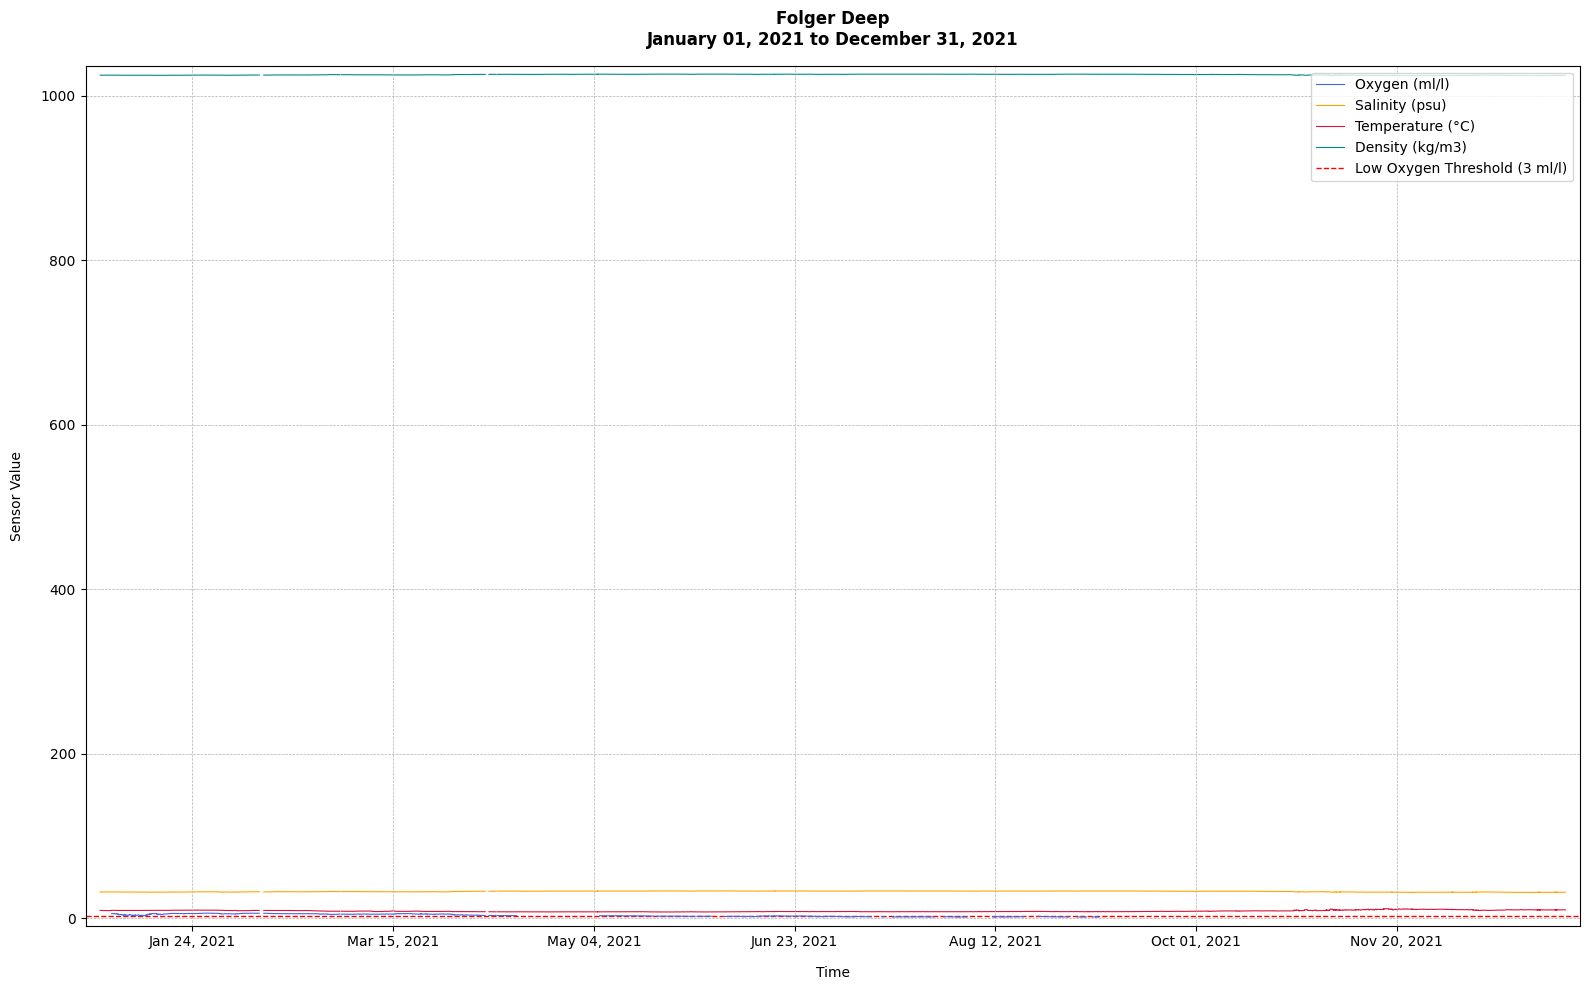

In [9]:
my_functions.plot_dataframe(df=deep_yr_21_indicators, locationCode="FGPD")

In [10]:
# TODO: commentary on scaling

In [11]:
# TODO: make fucntion that will do twin y axis for parameters with greater magnitudes 
# and replace the plot below

In [12]:
# TODO: make function that will subplot specified parameters from folger deep and pinnacle

In [13]:
# TODO: questions for the students moving forward

Notice that the absolute scale is too great to view all parameters together. 

Alternatively, we can specify the columns of the data frame we want plotted. Below, for example, we select the columns "Oxygen (ml/l)", "Salinity (psu)", and "Temperature (°C)" to plot.

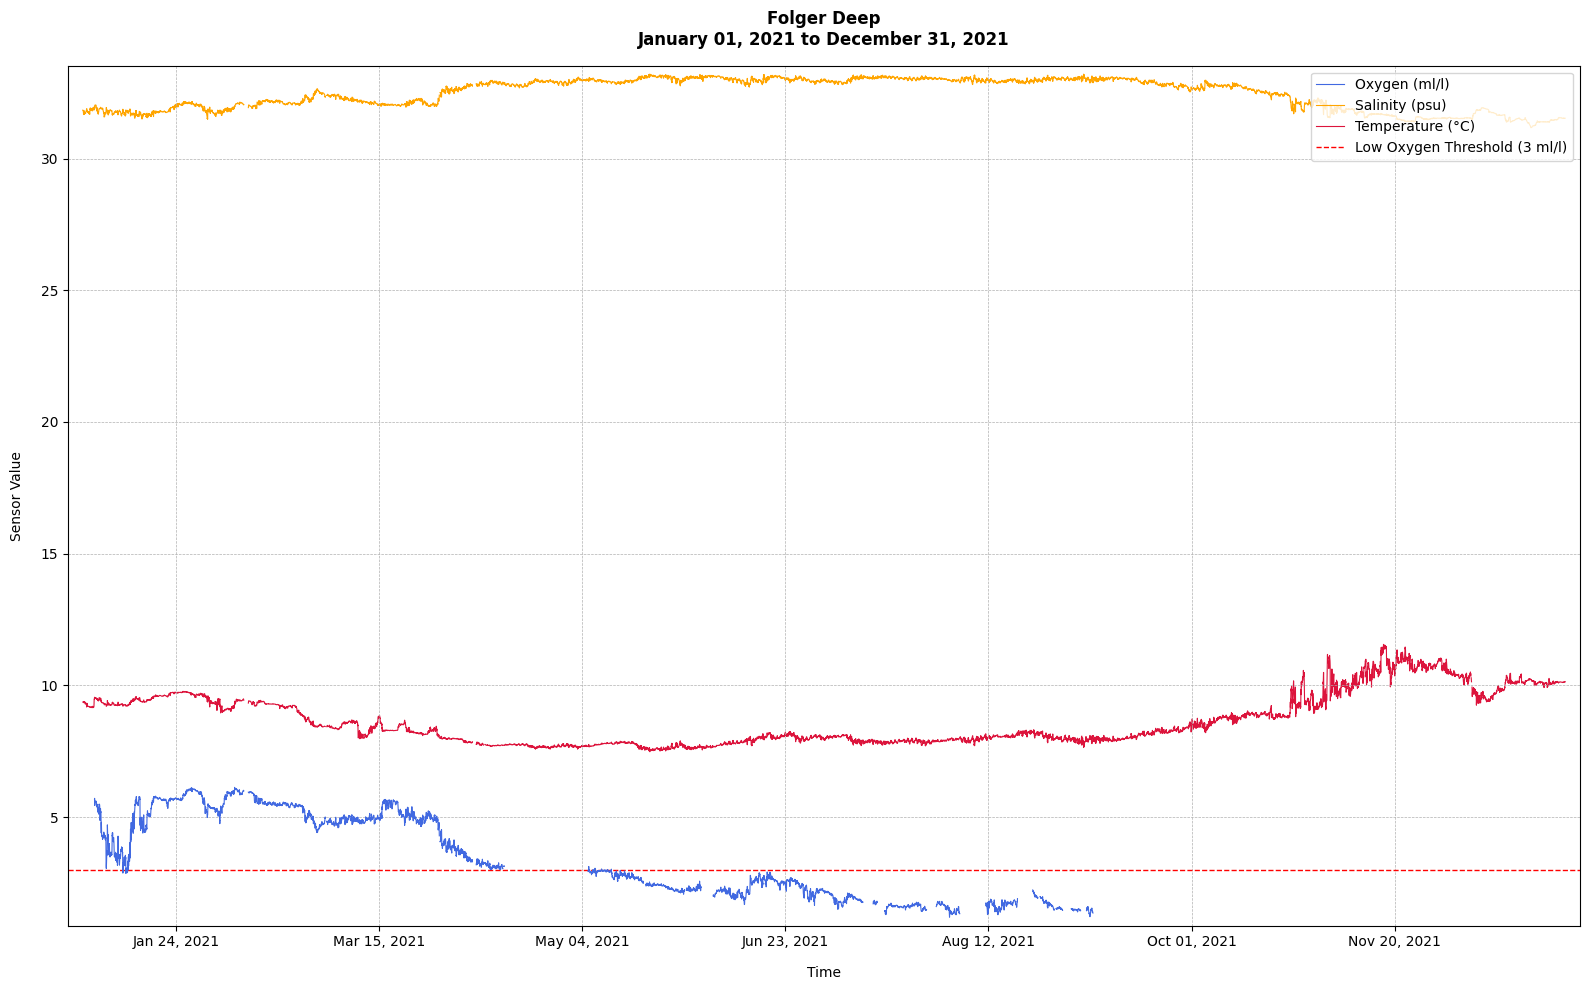

In [14]:
my_functions.plot_dataframe(df=deep_yr_21_indicators[["Oxygen (ml/l)", "Salinity (psu)", "Temperature (°C)"]], locationCode="FGPD")

And here we choose to plot "Oxygen (ml/l)", "Chlorophyll (µg/l)", "Salinity (psu)", "Temperature (°C)" from Folger Pinnacle.

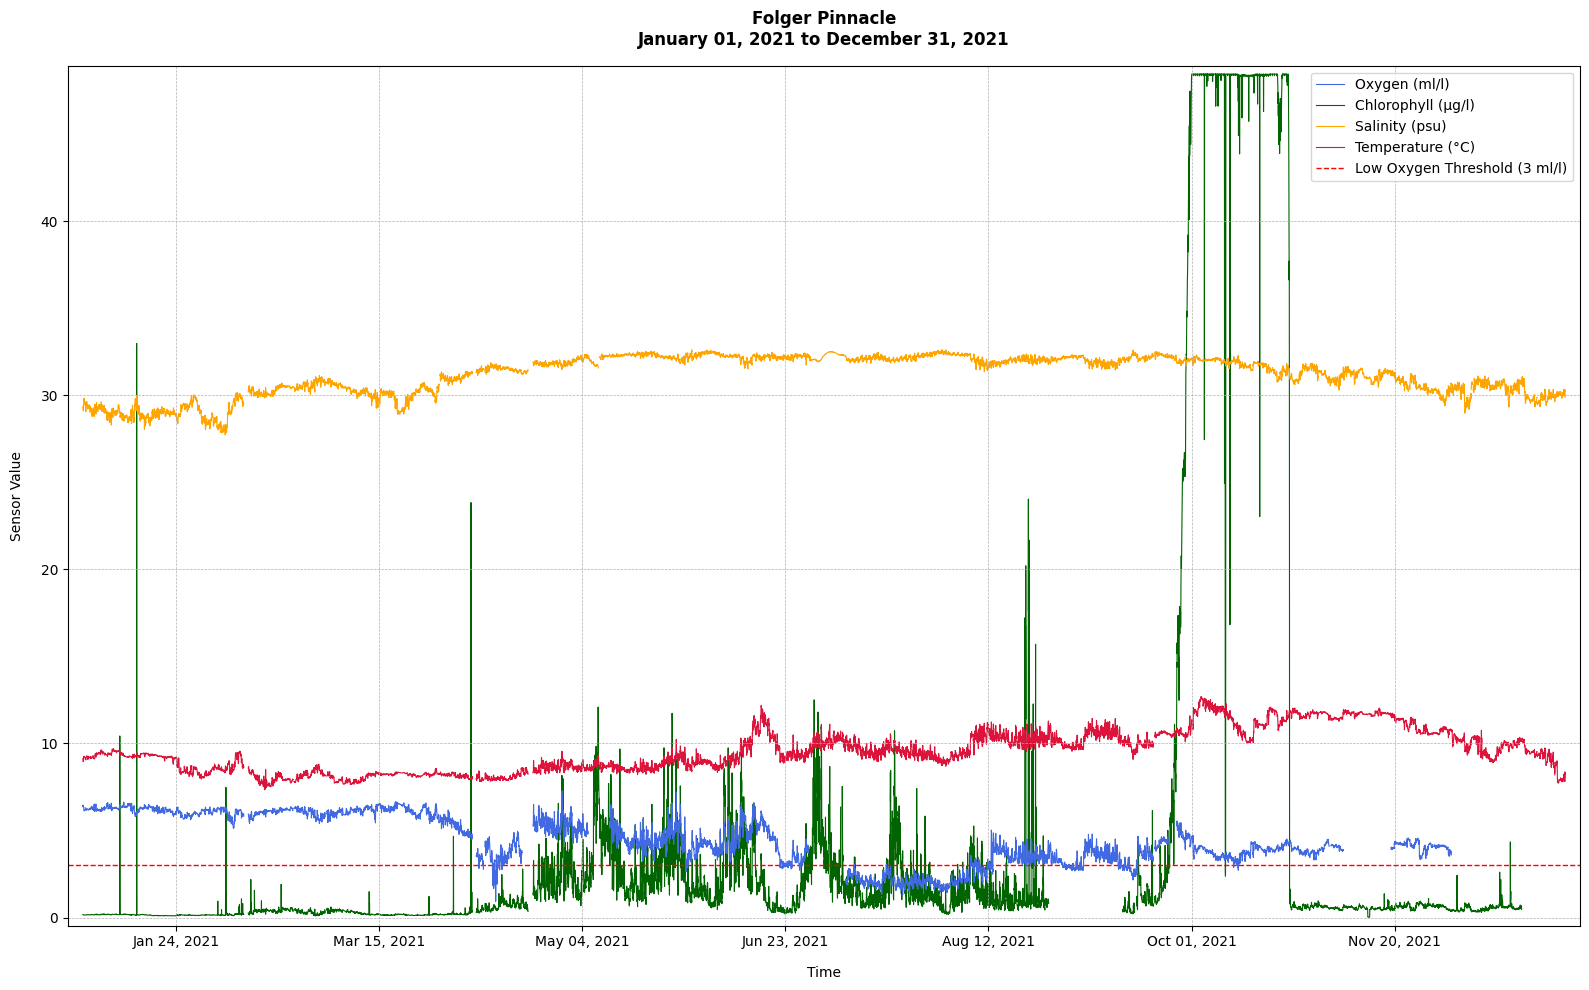

In [15]:
my_functions.plot_dataframe(df=pin_yr_21_indicators[["Oxygen (ml/l)", "Chlorophyll (µg/l)", "Salinity (psu)", "Temperature (°C)"]], locationCode="FGPPN")

## Plotting Smaller Time Series

Instead of making repeated API calls, we can use the full-year data frame we already generated to extract smaller time periods of interest. This avoids unnecessary API requests which are time and resource intensive.

### 1. Define your smaller times

 From looking at the year long plots above we can identify several time periods that would prompt further investigation including:

- A seasonal view - April through October

- Low oxygen - July through August

- High chlorophyll - several times, April through October 

In [16]:
# TODO: add diff time frames for high chlorophyll

> NOTE: We define our dates as strings using the following ISO 8601 UTC format: "YYYY-MM-DDTHH:MM:SS.sssZ".

In [17]:
# Define start and end dates
apr_21_str = "2021-04-01T00:00:00.000Z"
nov_21_str = "2021-11-01T00:00:00.000Z"
jul_21_str = "2021-07-01T00:00:00.000Z"
aug_21_str = "2021-09-01T12:00:00.000Z"
sept_21_str = "2021-09-15T00:00:00.000Z"

### 2. Convert dates to 'Timestamp' objects

As mentioned above, we use this specific format to define our dates, and then we convert them to Pandas 'Timestamp' objects. This tells the the program that these each defined date is a moment in time, rather than just text, and is necessary for the next step.

In [18]:
# Convert string dates to pandas Timestamps
apr_21 = pd.to_datetime(apr_21_str)
nov_21 = pd.to_datetime(nov_21_str)
jul_21 = pd.to_datetime(jul_21_str)
aug_21 = pd.to_datetime(aug_21_str)
sept_21 = pd.to_datetime(sept_21_str)

### 3. Create new Data Frames by 'slicing' the original one

Now that the timestamps are defined, we use them to slice specific time-based subsets of the full data frame. This is done using 'dataframe.loc[start:stop]', which selects only the rows from the data frame that fall between two dates.

In [19]:
# Deep: Slice views of the full-year data
deep_season_df = deep_yr_21_indicators.loc[apr_21:nov_21]
deep_low_ox_df = deep_yr_21_indicators.loc[jul_21:aug_21]
deep_high_chlor_df = deep_yr_21_indicators.loc[sept_21:nov_21]

# Pinnacle: Slice views of the full-year data
pin_season_df = pin_yr_21_indicators.loc[apr_21:nov_21]
pin_low_ox_df = pin_yr_21_indicators.loc[jul_21:aug_21]
pin_high_chlor_df = pin_yr_21_indicators.loc[sept_21:nov_21]

In [20]:
# TODO: add a visual of a data frame being sliced by time

### 4. Plot using Data Frames

#### Seasonal View (April through October)

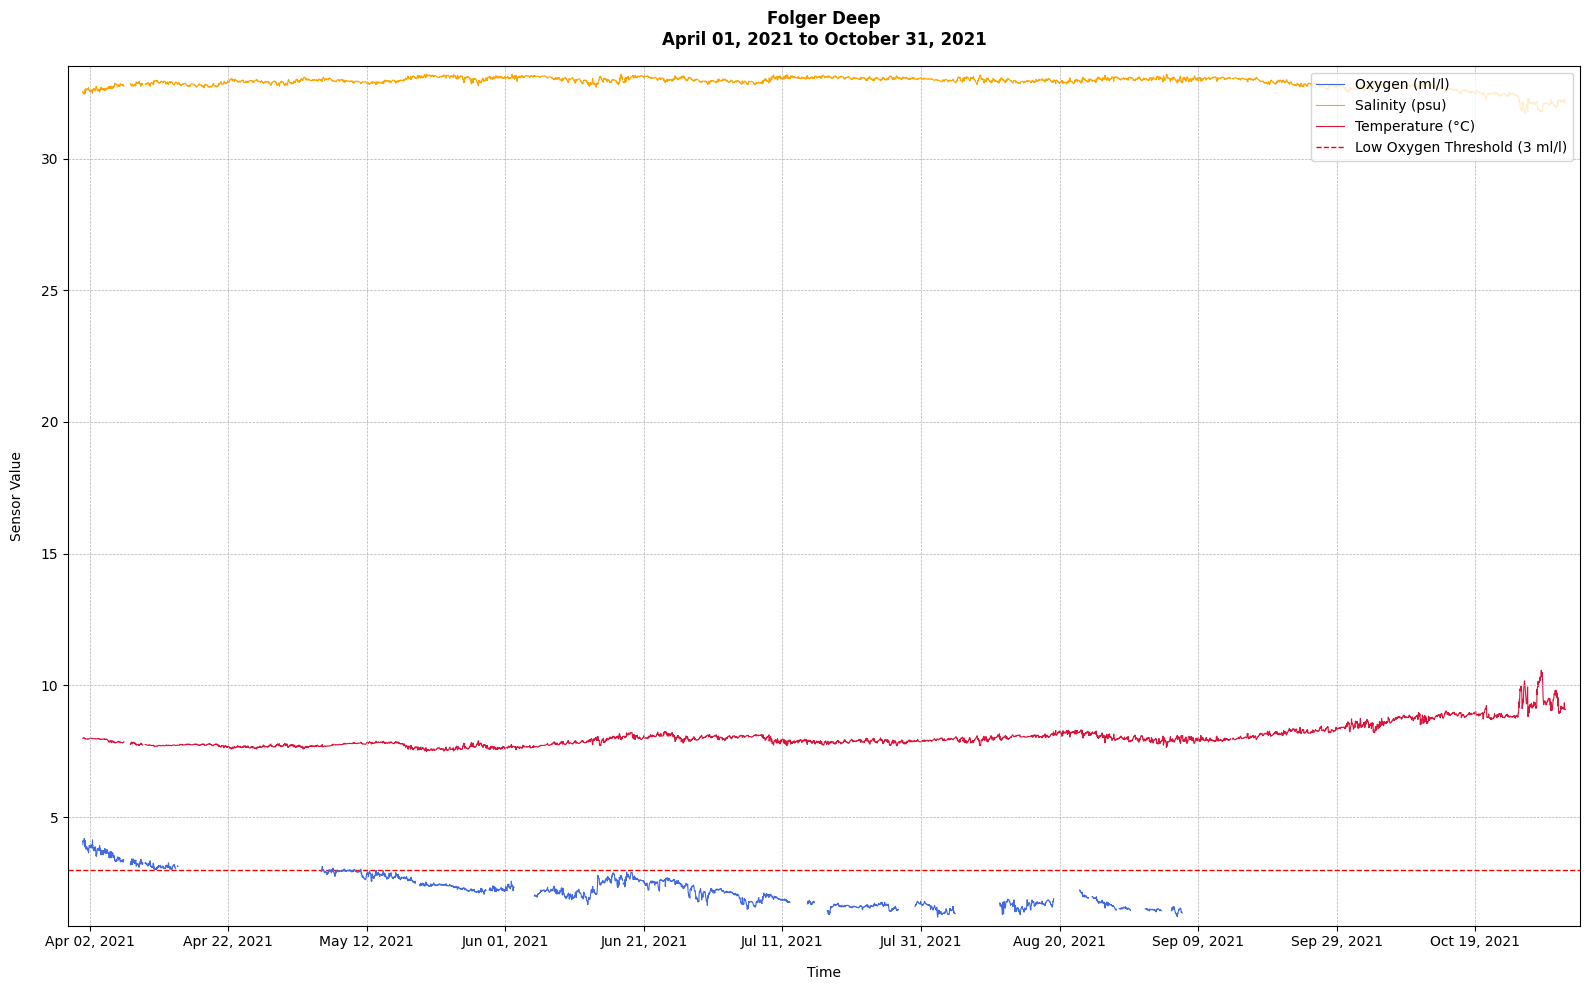

In [21]:
my_functions.plot_dataframe(df=deep_season_df[["Oxygen (ml/l)", "Salinity (psu)", "Temperature (°C)"]], locationCode="FGPD")

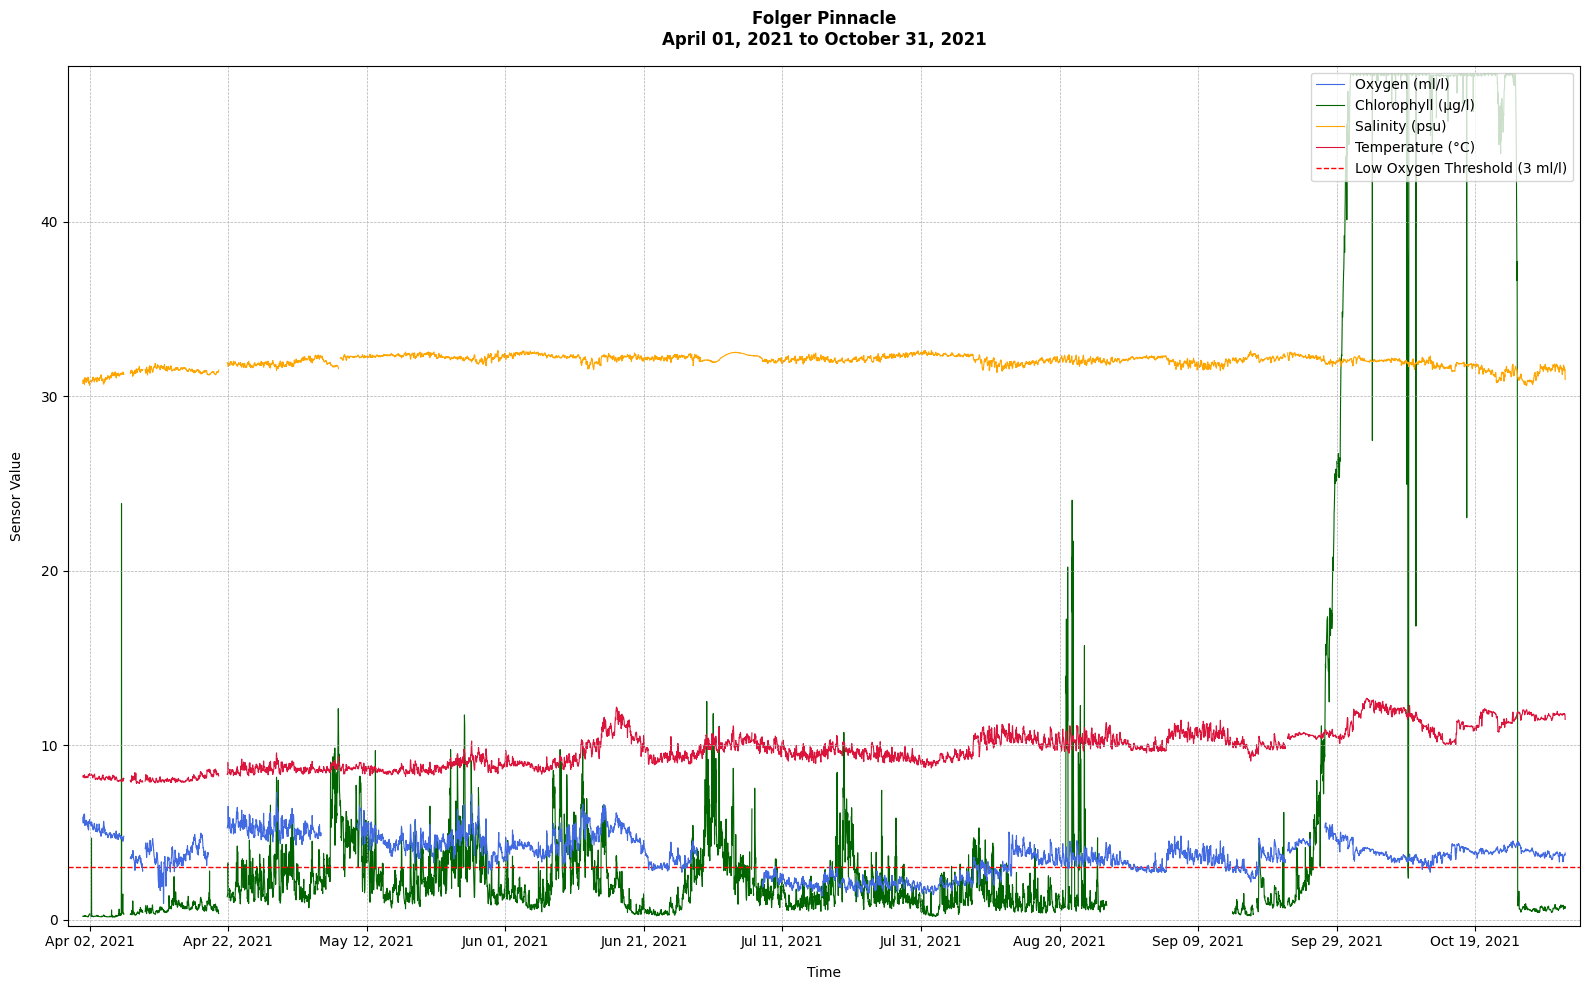

In [22]:
my_functions.plot_dataframe(df=pin_season_df[["Oxygen (ml/l)", "Chlorophyll (µg/l)", "Salinity (psu)", "Temperature (°C)"]], locationCode="FGPPN")

#### Low Oxygen (July through September)

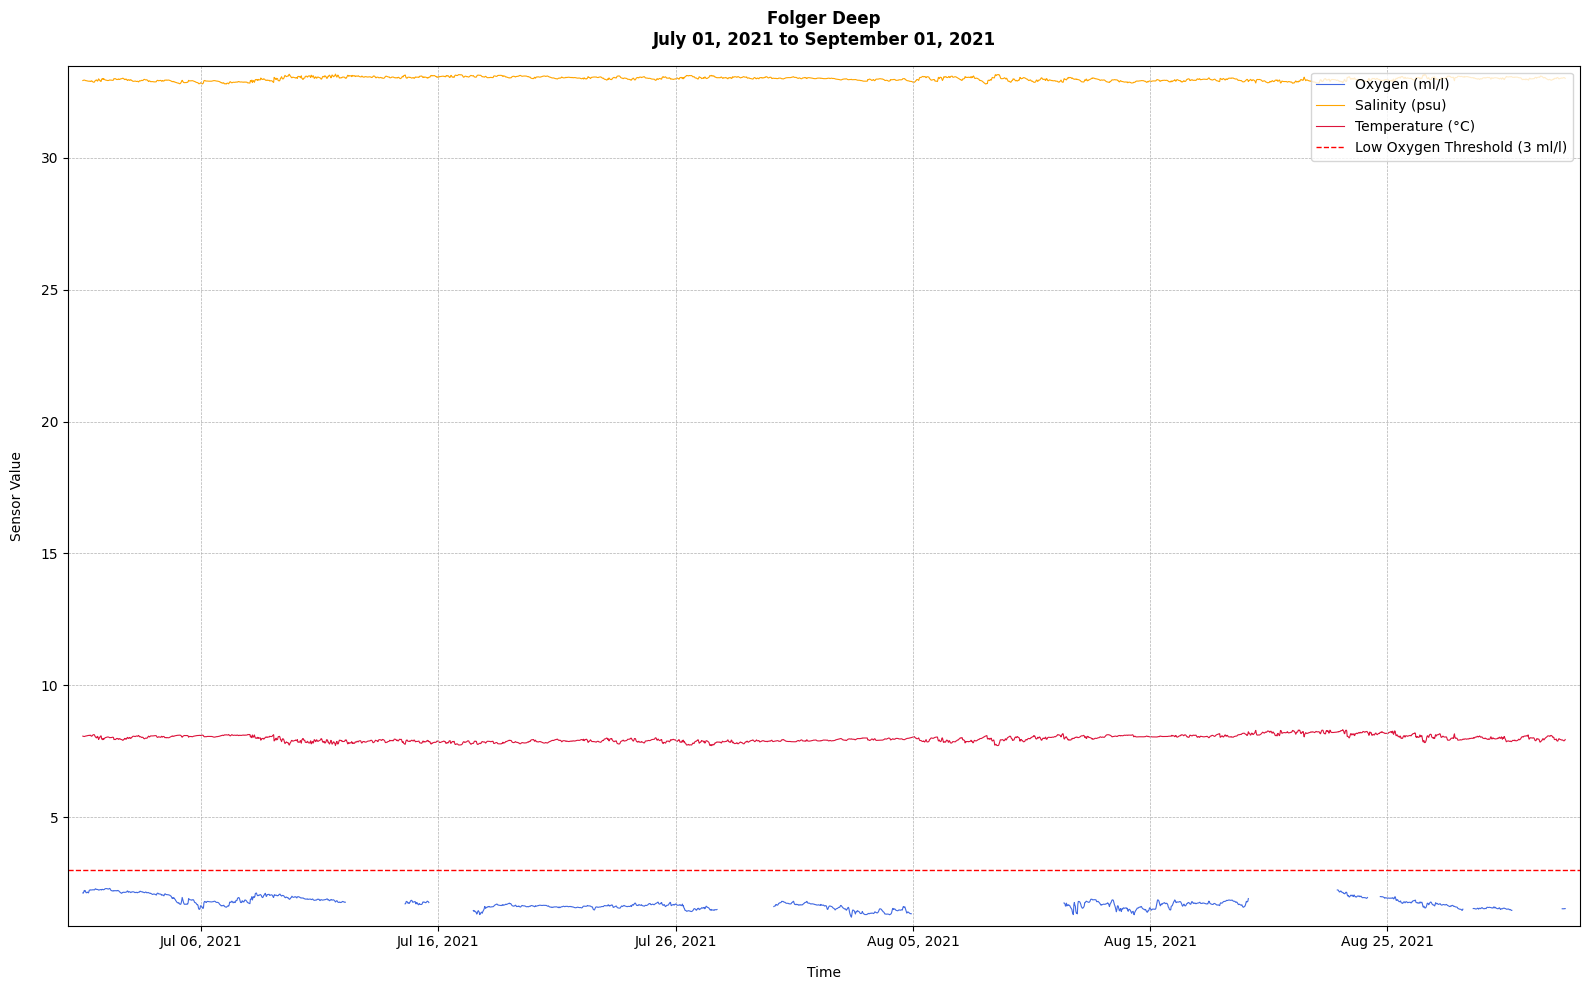

In [23]:
my_functions.plot_dataframe(df=deep_low_ox_df[["Oxygen (ml/l)", "Salinity (psu)", "Temperature (°C)"]], locationCode="FGPD")

In [24]:
# TODO: remove smoothing - make function to subplot raw plot then zoomed in plot?

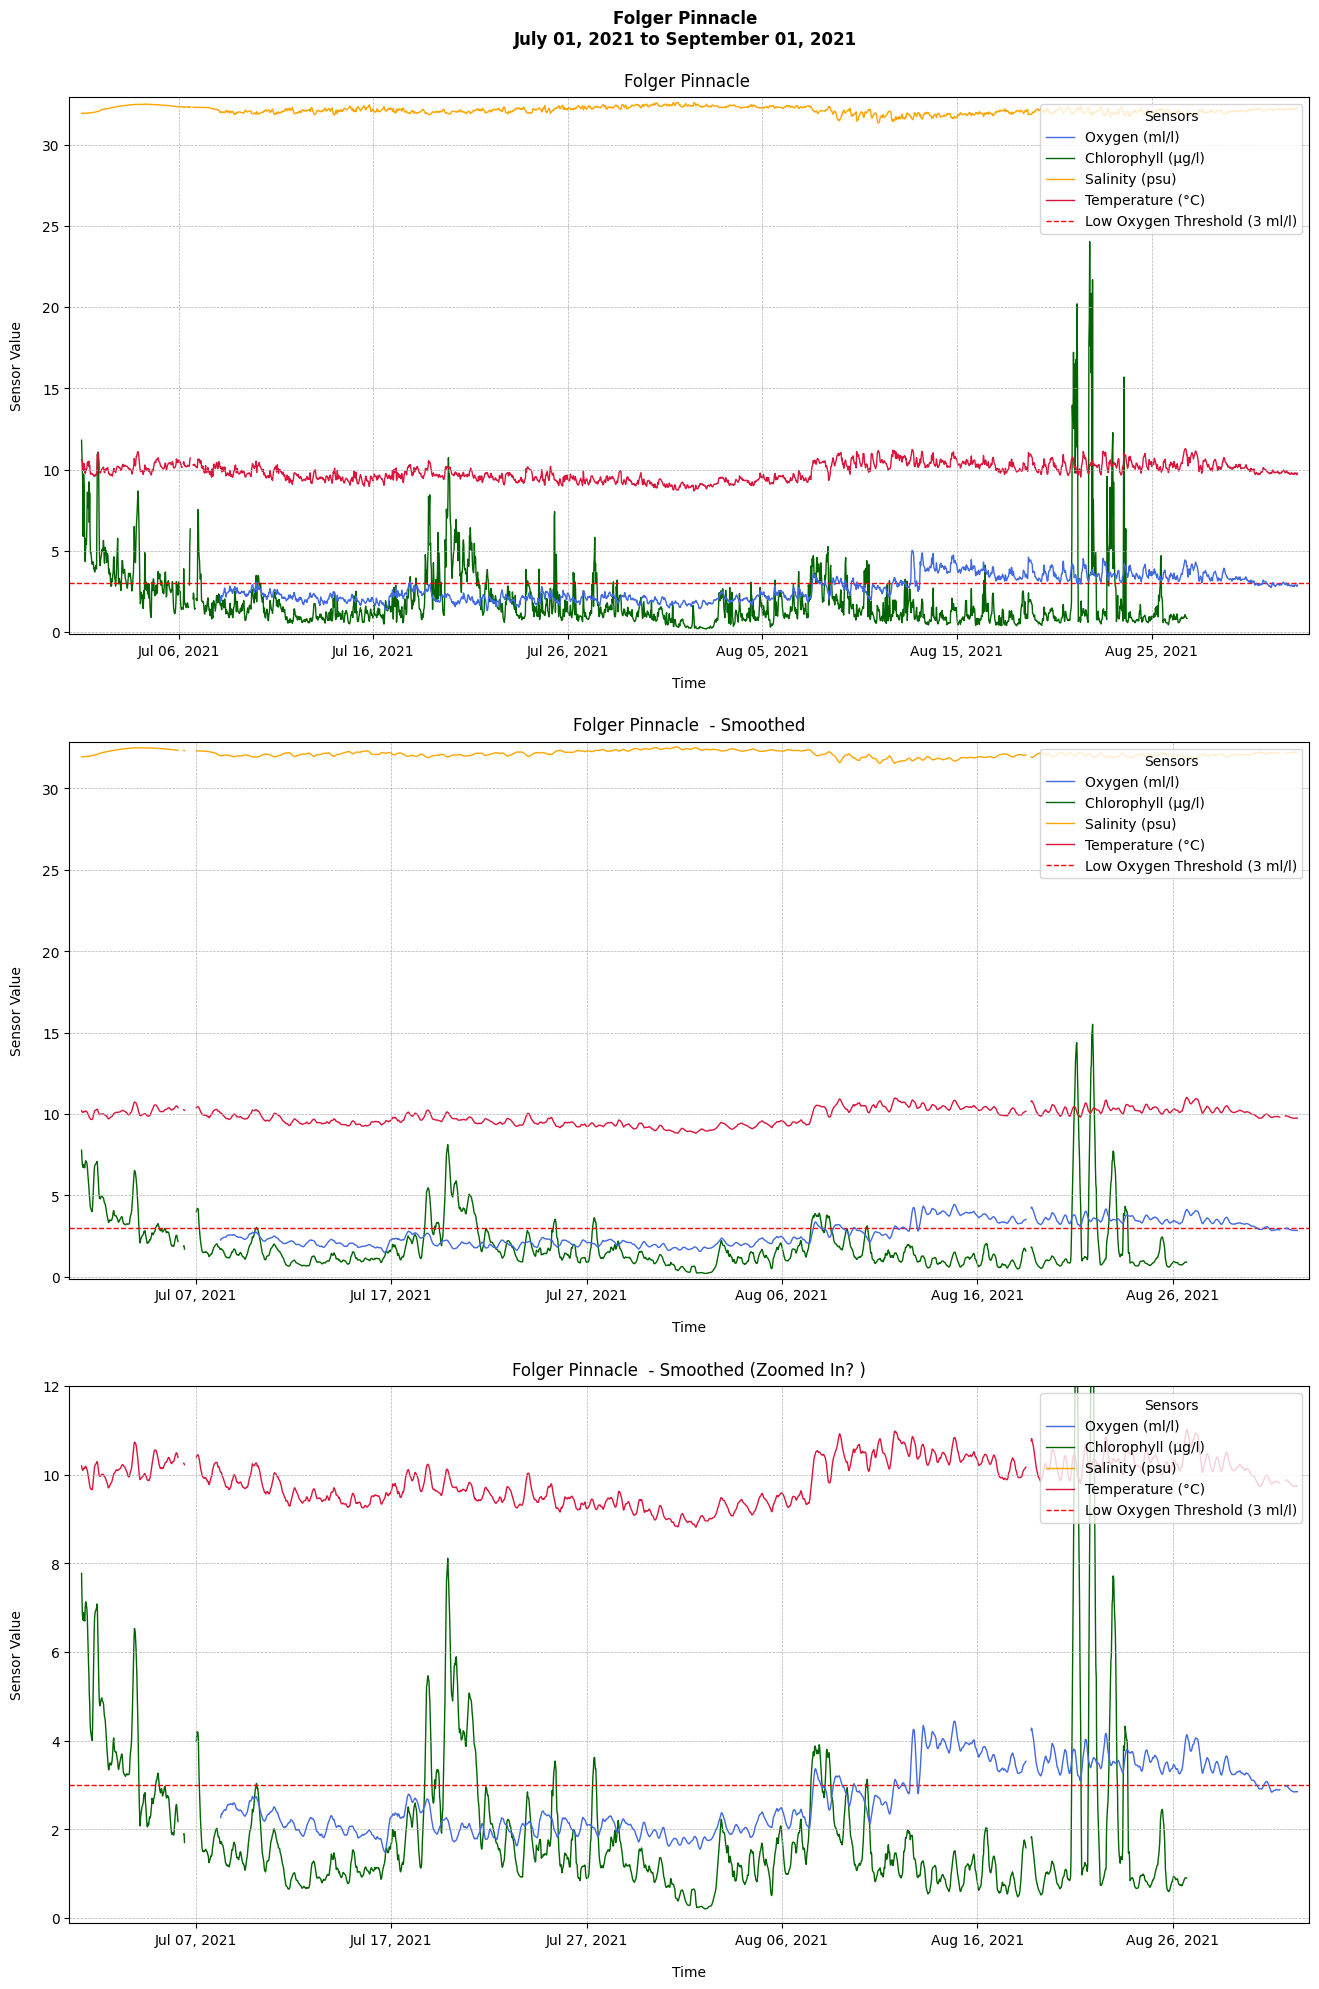

In [25]:
my_functions.plot_dataframe_norm_and_scale(df=pin_low_ox_df[["Oxygen (ml/l)", "Chlorophyll (µg/l)", "Salinity (psu)", "Temperature (°C)"]], locationCode="FGPPN", ymax=12)

In [ ]:
# TODO: on plots below- add legend for low ox threshold

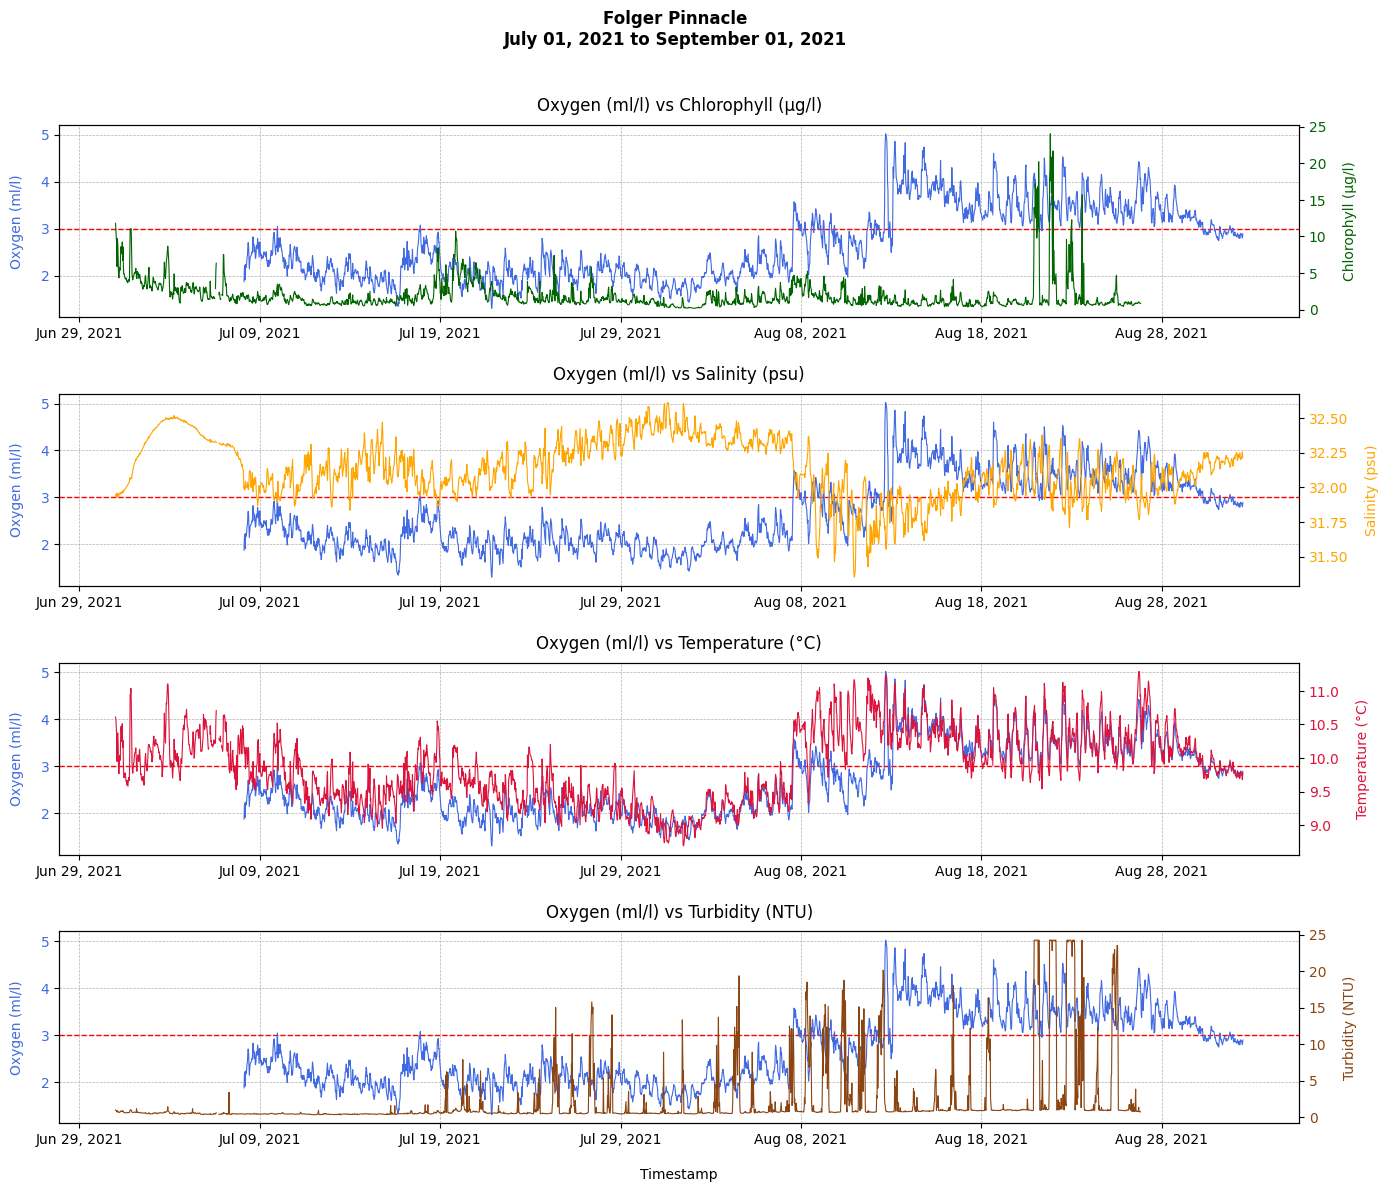

In [26]:
my_functions.subplot_all_with_oxygen(df=pin_low_ox_df[["Oxygen (ml/l)", "Chlorophyll (µg/l)", "Salinity (psu)", "Temperature (°C)", "Turbidity (NTU)"]], locationCode="FGPPN")

#### High Chlorophyll (September through October)

In [28]:
# TODO: fix the plot below - truncated y? 

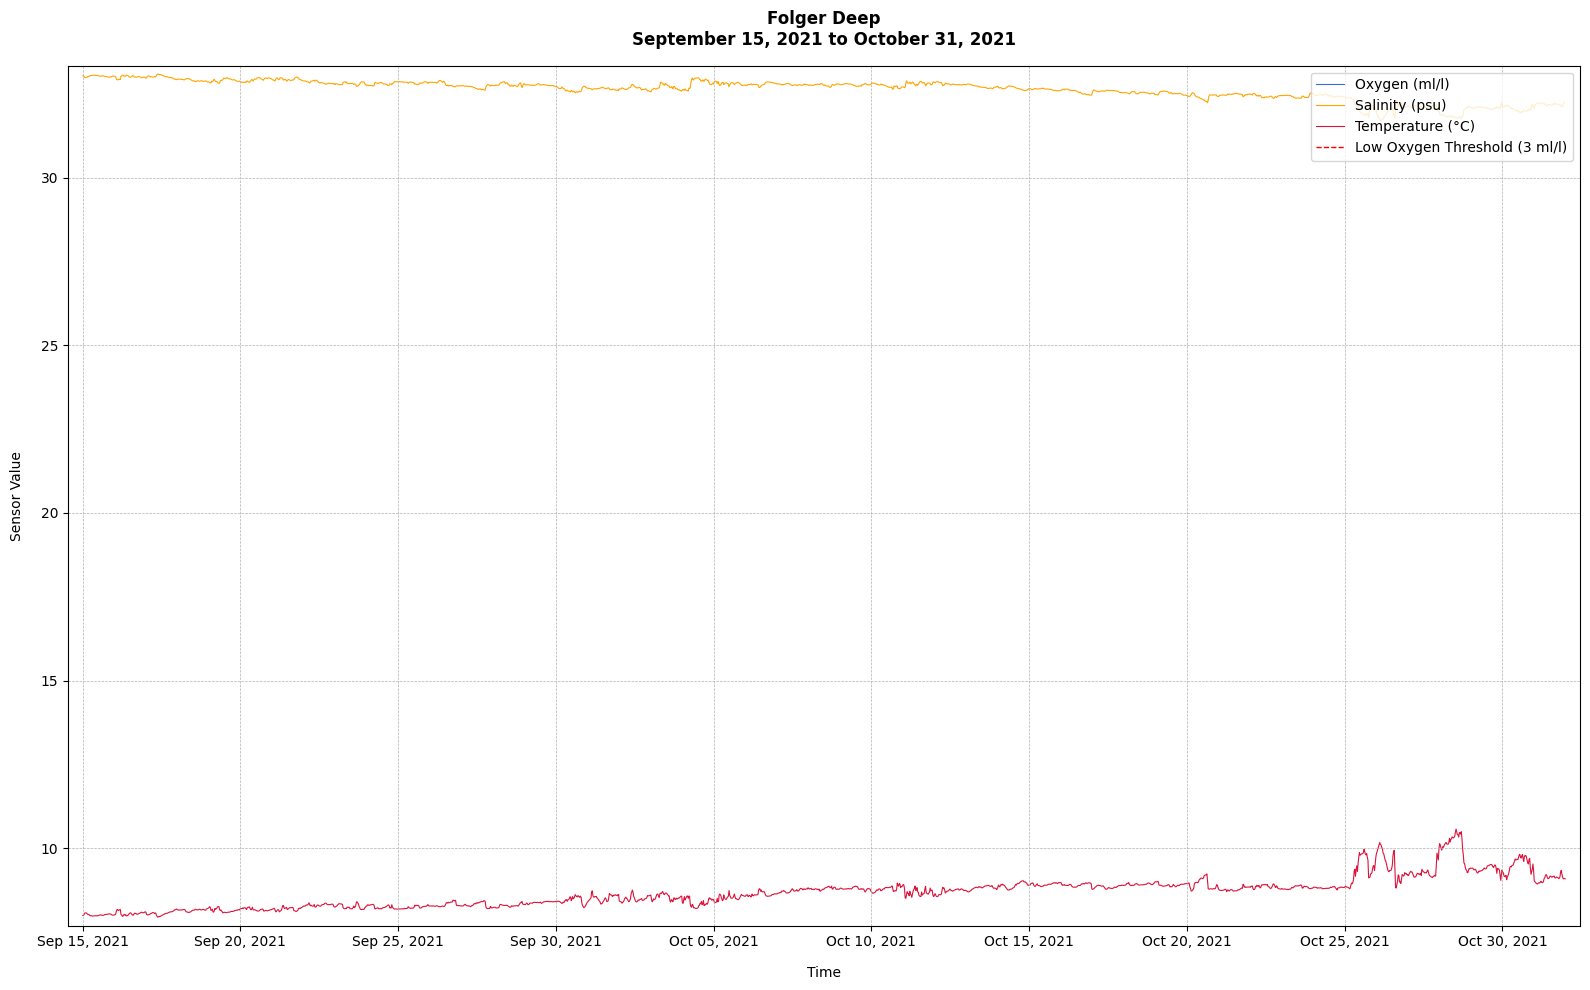

In [27]:
my_functions.plot_dataframe(df=deep_high_chlor_df[["Oxygen (ml/l)", "Salinity (psu)", "Temperature (°C)"]], locationCode="FGPD")

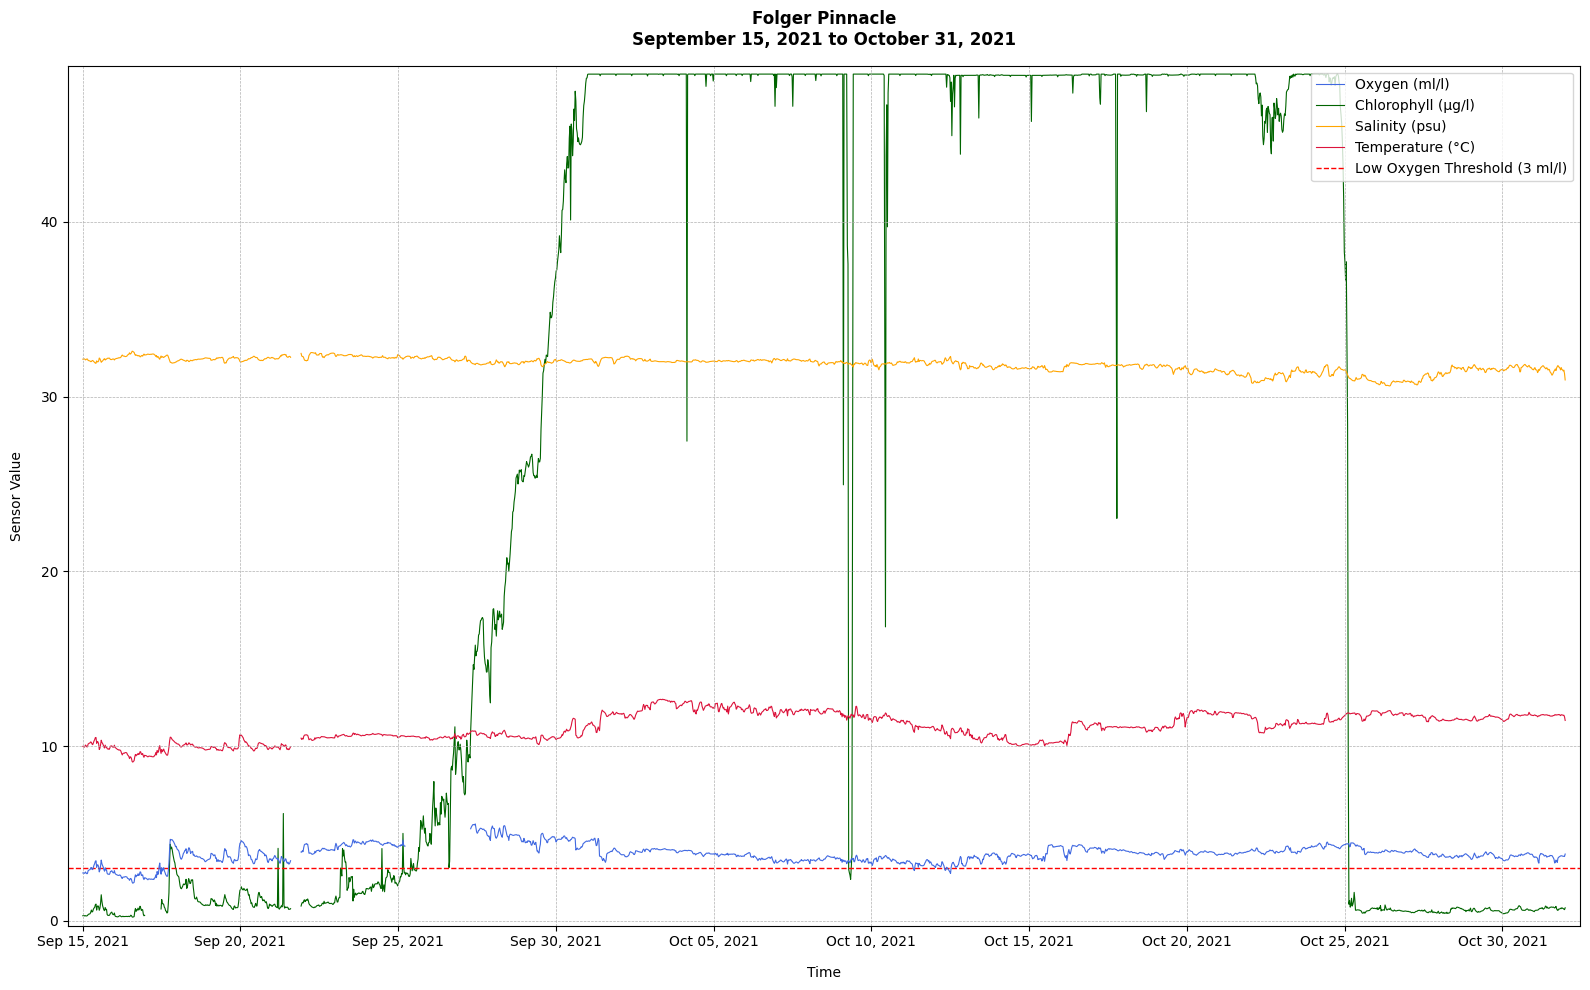

In [29]:
my_functions.plot_dataframe(df=pin_high_chlor_df[["Oxygen (ml/l)", "Chlorophyll (µg/l)", "Salinity (psu)", "Temperature (°C)"]], locationCode="FGPPN")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1cd2cd01-70e8-41b6-af2d-f797c6675dbe' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>